<a href="https://colab.research.google.com/github/geez5/CustomersegmentationClustering/blob/main/customer_clustering_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis


In [5]:
# loading the data from csv files to a pandas dataframe
customer_data = pd.read_csv('/content/data.csv.zip', encoding='latin1') # or 'ISO-8859-1'

In [6]:
# first 5 rows of the dataframe
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
#finding the number of rows and columns
customer_data.shape

(541909, 8)

In [8]:
# getting some information about the dataset
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
#checking for missing values
customer_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:
# cleaning the data
df = pd.DataFrame(customer_data)
df_cleaned = df.dropna()

In [11]:
# check if the data  is cleaned
# Returns False if there are no null values left (i.e., the data is clean).
# Returns True if there are still some nulls.
print(df_cleaned.isnull().values.any())


False


choosing the quantity and unitprice


In [12]:
X = customer_data[['Quantity', 'UnitPrice']].values

In [13]:
print(X)

[[6.   2.55]
 [6.   3.39]
 [8.   2.75]
 ...
 [4.   4.15]
 [4.   4.15]
 [3.   4.95]]


In [14]:
X_unique = np.unique(X, axis=0)
print(len(X_unique))  # Should print 8394



8394


In [15]:
# Double check no duplicates in X_unique
print(pd.DataFrame(X_unique).duplicated().sum())  # Should print 0

0


In [16]:
# to overwrite x with the cleaned version
X = np.unique(X, axis=0)


In [17]:
# to find out the number of unique rows with no duplicates
print(len(X))  # Should be 8394 now


8394


In [18]:
# to check if there are any duplicates left
print(len(X), len(np.unique(X, axis=0)))

8394 8394


Choosing the Number of Clusters

wCSS -> within cluster sum of squares

In [19]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

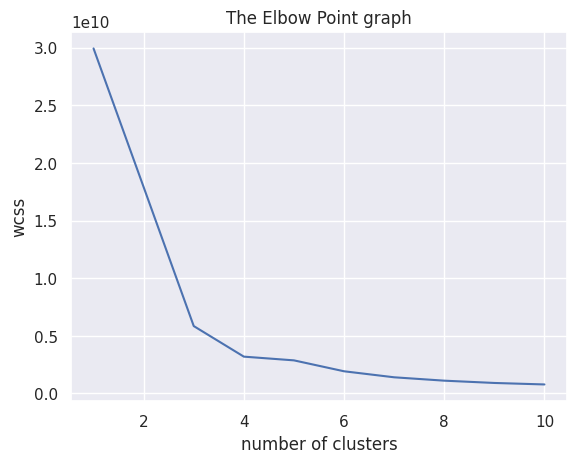

In [20]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Here, Optimum Number of Clusters = 4

Training the k-Means Clustering Model

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Y = kmeans.fit_predict(X_scaled)



In [22]:
kmeans = KMeans (n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on thier cluster
Y = kmeans.fit_predict(X)

# Set print options to display the full array
np.set_printoptions(threshold=np.inf)

print(Y)


[2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Visualizing all the clusters (kmeans)

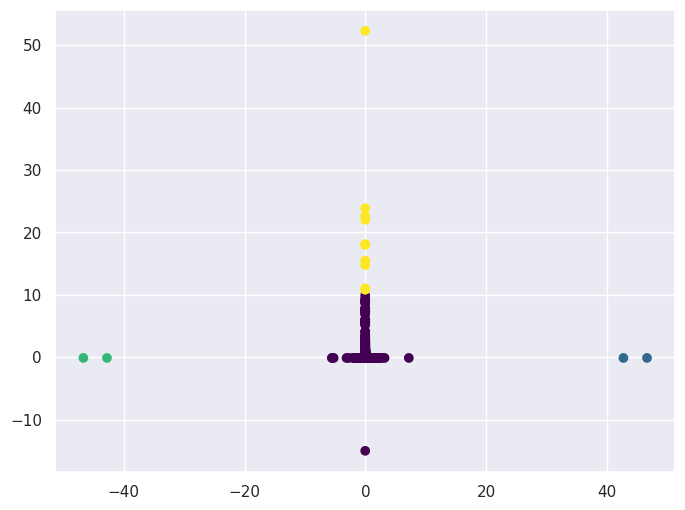

In [ ]:
# plotting all the clusters and thier centroids

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis')

Text(0.5, 0, 'Annual Income (k$)')

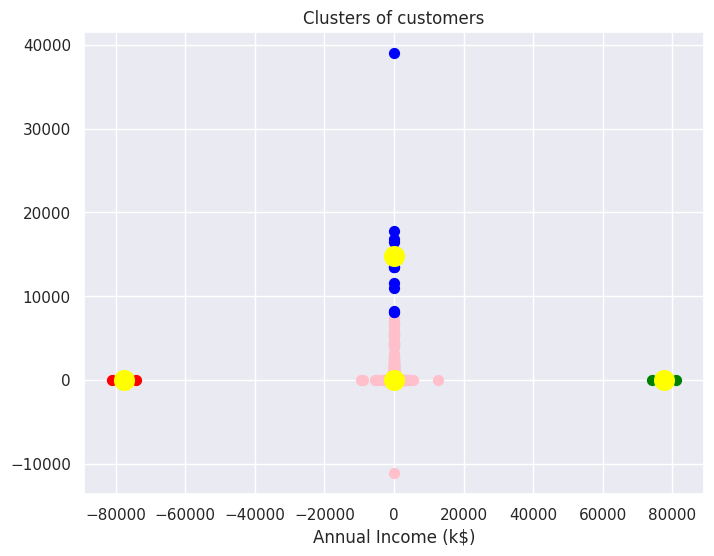

In [ ]:
# plotting all the clusters and thier centroids

plt.figure(figsize=(8, 6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='pink', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

#plot the centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')



Since the data has low variance therefore, almost all points are in cluster 0, and only a few in clusters 1, 2, 3 (one dominant cluster)

clustering through DBSCAN- Density-Based Spatial Clustering of Applications with Noise

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
Y = agg.fit_predict(X_scaled)


Does not require you to pick k

Can detect noise/outliers

Will assign -1 to outliers

Visualize the clusters (DBSCAN)

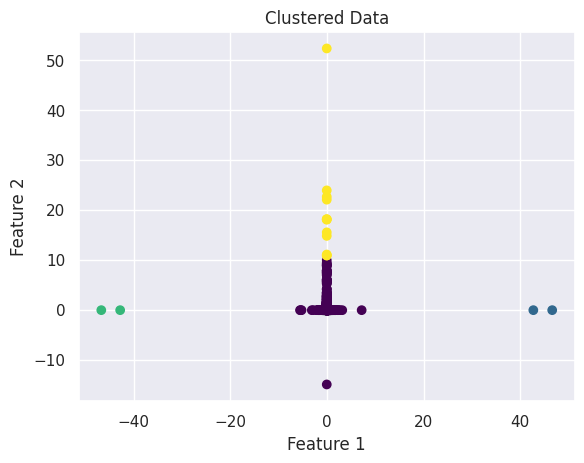

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



 Hierarchical Clustering (Agglomerative)

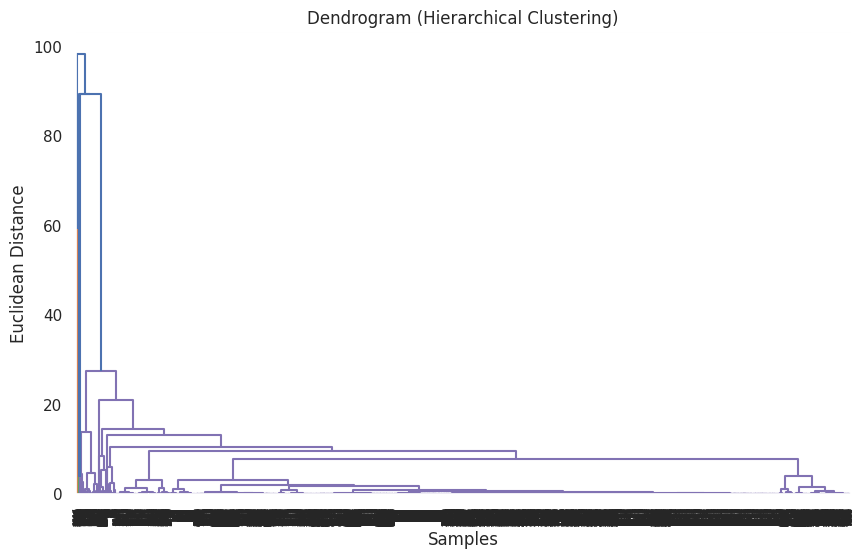

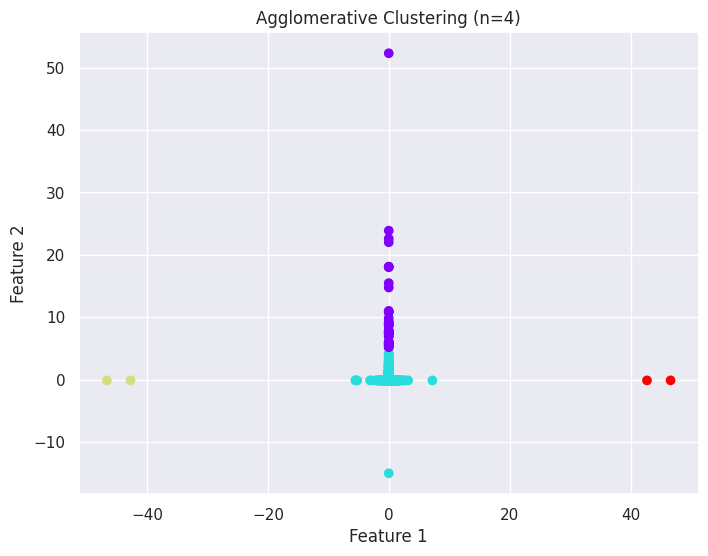

   Feature1  Feature2  Cluster
0  -80995.0      2.08        2
1  -74215.0      1.04        2
2   -9600.0      0.00        1
3   -9360.0      0.03        1
4   -9058.0      0.00        1


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Assuming your cleaned unique data is in variable X
# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Plot dendrogram to visualize optimal number of clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 3: Apply Agglomerative Clustering
# Step 3: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward') # Remove affinity='euclidean'
Y = agg.fit_predict(X_scaled)

# Step 4: Visualize the clusters (only if 2D or using first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='rainbow')
plt.title("Agglomerative Clustering (n=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Optional: Add cluster labels to a DataFrame
df_clusters = pd.DataFrame(X, columns=["Feature1", "Feature2"])  # rename based on your actual features
df_clusters["Cluster"] = Y

print(df_clusters.head())


EDA- Exploratory Data Analysis

In [7]:
# Load the CSV file with proper encoding
df = pd.read_csv('/content/data.csv.zip', encoding='ISO-8859-1')


In [8]:
 # Basic Overview
print("Shape of the dataset:", df.shape)
print(df.info())
print(df.head())


Shape of the dataset: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6  

In [9]:
#  Data Quality Checks
print(df.isnull().sum())
print(df.duplicated().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
5268


In [10]:
#Gives numerical stats + object column summaries (like unique, top, freq).
print(df.describe(include='all'))


       InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

             InvoiceDate   

<Axes: >

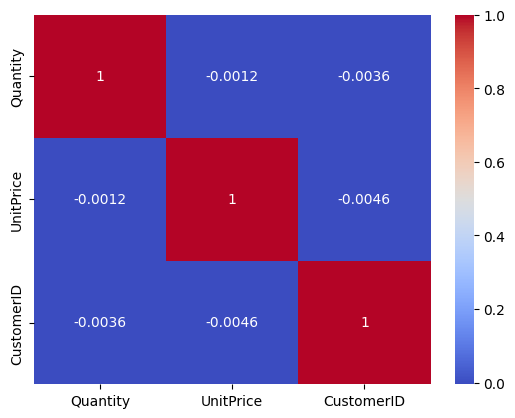

In [11]:
# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


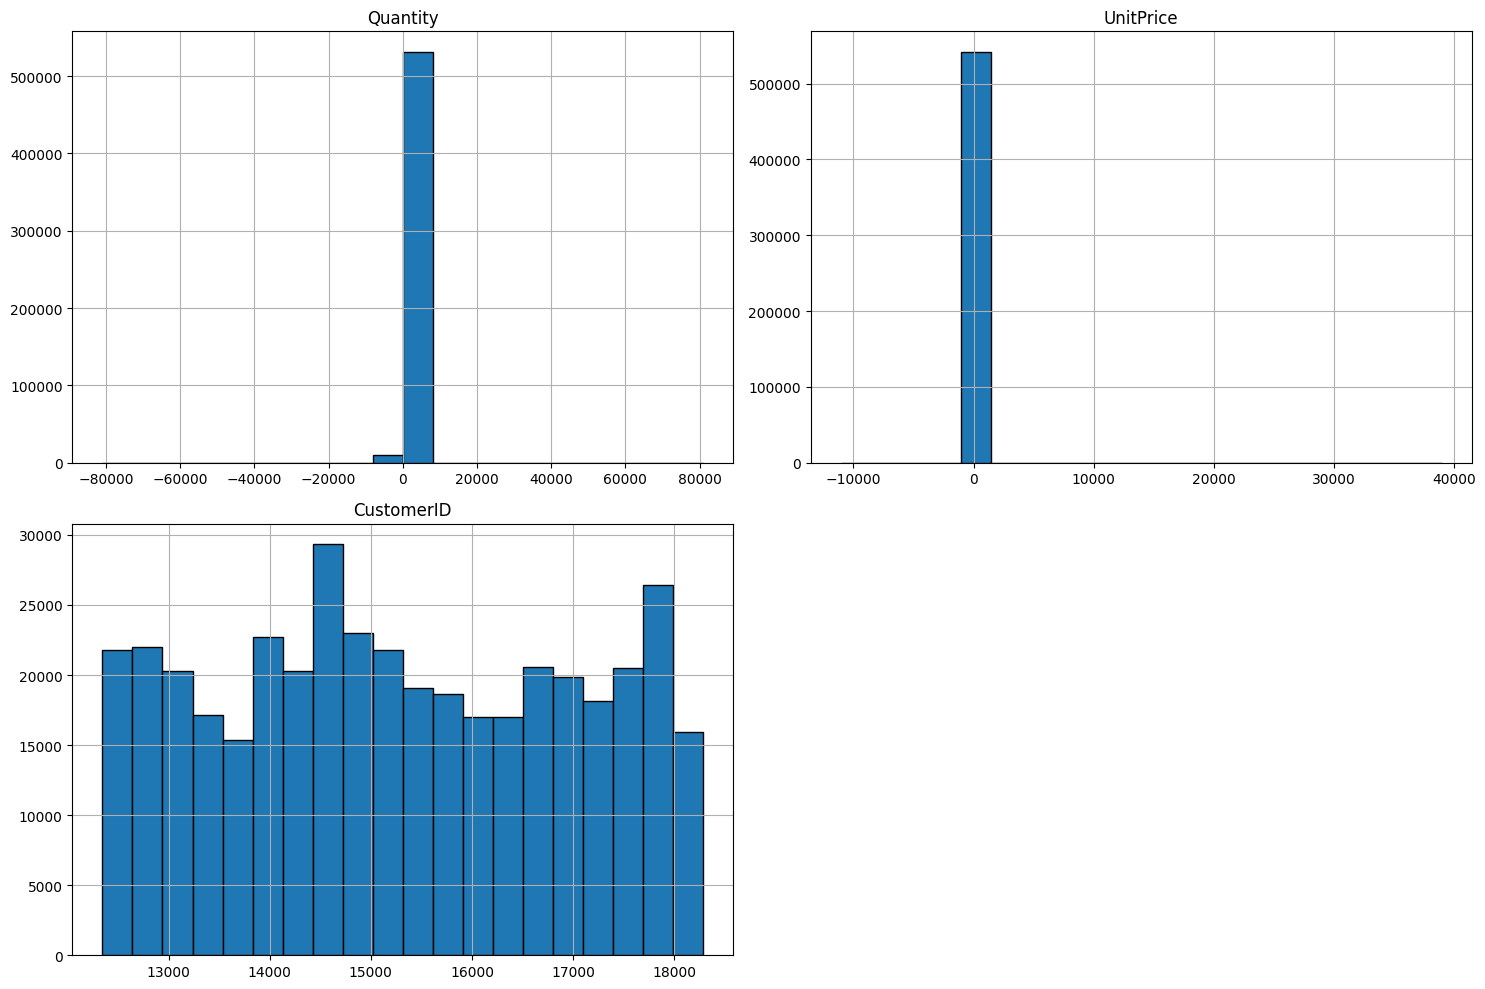

In [15]:
# Distributions of Numerical Features
df.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.tight_layout()
plt.show()

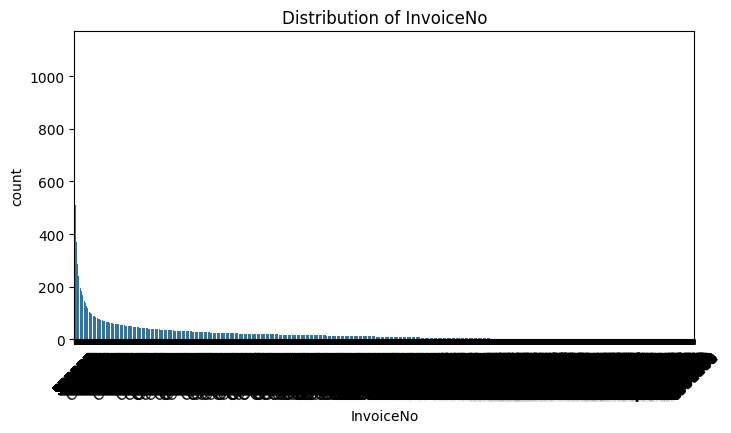

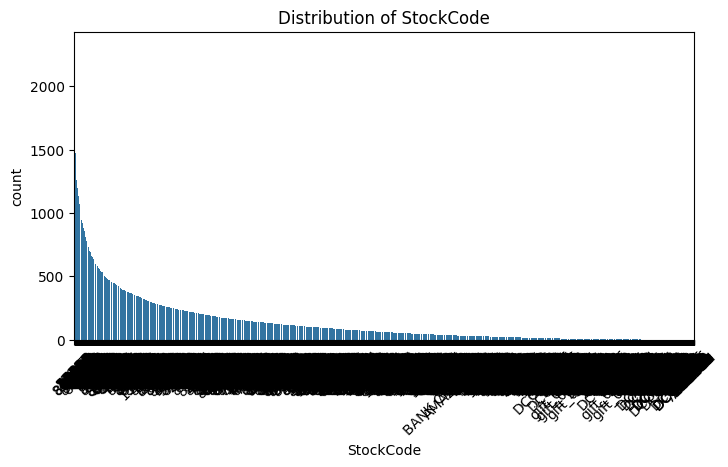

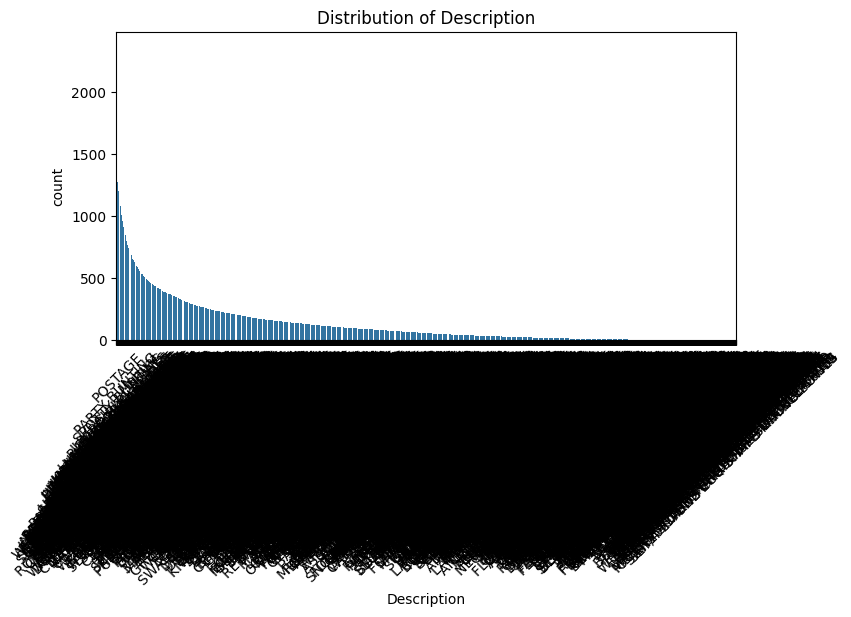

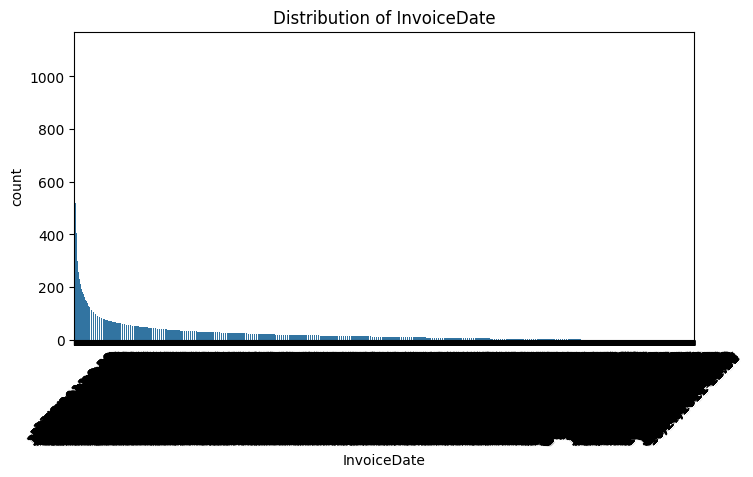

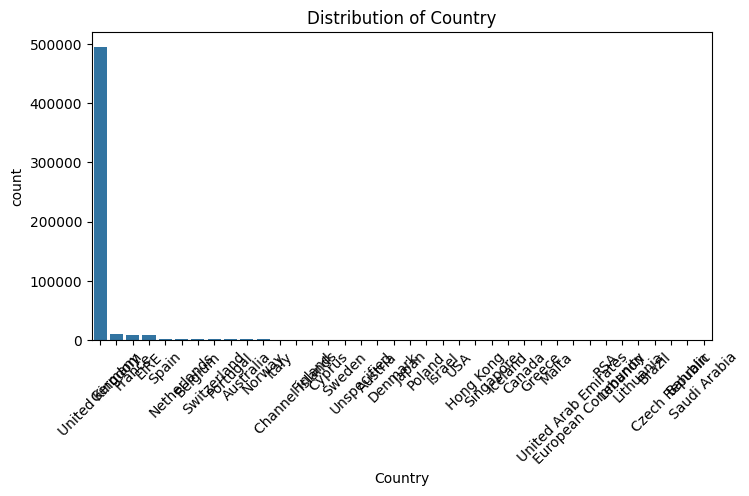

In [16]:
#Categorical Column Distributions
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

Generating Business Insights

In [24]:
# 1. Basic Clustering Summary & Business Rule Labels
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Create features
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
# Replacing 'Customer ID' with 'CustomerID'
customer_df = df.groupby('CustomerID').agg({ # Assuming 'CustomerID' is the actual column name in your data
    'InvoiceNo': 'nunique',     # Frequency
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

customer_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Step 2: Scale & cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[['Frequency', 'Quantity', 'TotalAmount']])

kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Summary for each cluster
cluster_summary = customer_df.groupby('Cluster').agg({
    'Frequency': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'TotalAmount': ['mean', 'min', 'max'],
    'CustomerID': 'count' # Assuming 'CustomerID' is the actual column name in your data
}).reset_index()

cluster_summary.columns = ['Cluster',
                           'Avg_Frequency', 'Min_Freq', 'Max_Freq',
                           'Avg_Quantity', 'Min_Qty', 'Max_Qty',
                           'Avg_TotalAmount', 'Min_Tot', 'Max_Tot',
                           'Num_Customers']

print(cluster_summary)

   Cluster  Avg_Frequency  Min_Freq  Max_Freq  Avg_Quantity  Min_Qty  Max_Qty  \
0        0       3.666426         1        20    644.727645     -303    12540   
1        1      52.000000        26        77  77373.666667    49390   196719   
2        2     154.428571        76       248  32984.000000     5978    77180   
3        3      26.227053         4        89   6302.714976      560    32592   

   Avg_TotalAmount   Min_Tot    Max_Tot  Num_Customers  
0      1068.077350  -4287.63   13117.01           4149  
1    136450.252222  50862.44  279489.02              9  
2     54499.597143  11713.85  132572.62              7  
3     10913.349952   1296.44   57120.91            207  


In [26]:
# 2. Generate Descriptive Insights Automatically
def generate_insight(row):
    insights = []

    if row['Avg_TotalAmount'] > 10000:
        insights.append("High spenders")
    elif row['Avg_TotalAmount'] < 1000:
        insights.append("Low value customers")

    if row['Avg_Frequency'] > 40:
        insights.append("Frequent buyers / Loyal customers")
    elif row['Avg_Frequency'] < 5:
        insights.append("Occasional buyers")

    if row['Avg_Quantity'] > 500 and row['Avg_TotalAmount'] < 2000:
        insights.append("Bulk buyers or Discount seekers")

    if not insights:
        insights.append("Regular customers")

    return ", ".join(insights)

cluster_summary['Insight'] = cluster_summary.apply(generate_insight, axis=1)

print("\n📊 Cluster Insights:")
print(cluster_summary[['Cluster', 'Num_Customers', 'Insight']])



📊 Cluster Insights:
   Cluster  Num_Customers                                            Insight
0        0           4149  Occasional buyers, Bulk buyers or Discount see...
1        1              9   High spenders, Frequent buyers / Loyal customers
2        2              7   High spenders, Frequent buyers / Loyal customers
3        3            207                                      High spenders
